In [0]:
from tensorflow.keras.datasets import mnist

from tensorflow import keras
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


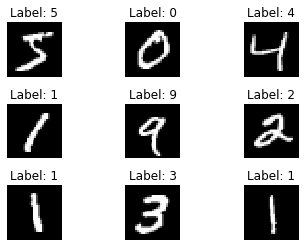

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

y_test_bk = y_test.copy()
x_test_bk = x_test.copy()

sub_plot = 330

for i in range(0,9):
  ax = plt.subplot(sub_plot+i+1)
  ax.imshow(x_train[i],cmap="gray")
  ax.set_title("Label: " + str(y_train[i]))
  ax.axis("off")
plt.subplots_adjust(hspace= .5)
plt.show()

In [0]:
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype("float32")
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype("float32")

print("x_train shape: " , x_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (60000, 28, 28, 1)
x_test shape:  (10000, 28, 28, 1)


In [0]:
#X axis normalization

x_train = x_train/255
x_test = x_test/255

#Y axis OneHotEncoding
print(y_train[0])
y_train = np_utils.to_categorical(y_train)
y_test =  np_utils.to_categorical(y_test)

print("y_train Shape: " , y_train.shape)
print(y_train[0])

5
y_train Shape:  (60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(5,5),padding="same",input_shape=(28,28,1),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, kernel_size=(5,5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________

In [0]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 - 9s - loss: 0.4120 - acc: 0.8674 - val_loss: 0.0871 - val_acc: 0.9744
Epoch 2/10
48000/48000 - 2s - loss: 0.1389 - acc: 0.9582 - val_loss: 0.0600 - val_acc: 0.9823
Epoch 3/10
48000/48000 - 2s - loss: 0.1006 - acc: 0.9693 - val_loss: 0.0482 - val_acc: 0.9856
Epoch 4/10
48000/48000 - 2s - loss: 0.0846 - acc: 0.9736 - val_loss: 0.0438 - val_acc: 0.9871
Epoch 5/10
48000/48000 - 2s - loss: 0.0745 - acc: 0.9773 - val_loss: 0.0369 - val_acc: 0.9887
Epoch 6/10
48000/48000 - 2s - loss: 0.0679 - acc: 0.9796 - val_loss: 0.0336 - val_acc: 0.9898
Epoch 7/10
48000/48000 - 2s - loss: 0.0612 - acc: 0.9815 - val_loss: 0.0323 - val_acc: 0.9905
Epoch 8/10
48000/48000 - 2s - loss: 0.0572 - acc: 0.9822 - val_loss: 0.0333 - val_acc: 0.9901
Epoch 9/10
48000/48000 - 2s - loss: 0.0545 - acc: 0.9829 - val_loss: 0.0288 - val_acc: 0.9923
Epoch 10/10
48000/48000 - 2s - loss: 0.0519 - acc: 0.9844 - val_loss: 0.0282 - val_acc: 0.9917


In [0]:
loss , accuracy = model.evaluate(x_train , y_train)
print("訓練集的準確度: {:.2f}".format(accuracy))
loss , accuracy = model.evaluate(x_test , y_test)
print("測試集的準確度: {:.2f}".format(accuracy))

print("Saving model: mnist.h5 ...")
model.save("mnist.h5")

60000/60000 [==============================] - 4s 62us/sample - loss: 0.0172 - acc: 0.9947
訓練集的準確度: 0.99
10000/10000 [==============================] - 1s 72us/sample - loss: 0.0201 - acc: 0.9922
測試集的準確度: 0.99
Saving model: mnist.h5 ...


In [0]:
print(y_test[0].astype(int))

[0 0 0 0 0 0 0 1 0 0]


In [0]:
y_pred = model.predict_classes(x_test)
tb = pd.crosstab(y_test_bk.astype(int), y_pred.astype(int), rownames=["Label"], colnames=["predict"])
print(tb)

predict    0     1     2     3    4    5    6     7    8    9
Label                                                        
0        976     0     0     0    0    0    2     1    1    0
1          0  1133     0     0    0    0    1     1    0    0
2          1     0  1026     1    1    0    0     2    1    0
3          0     0     2  1006    0    1    0     0    1    0
4          0     0     0     0  973    0    1     0    2    6
5          1     0     0     4    0  884    1     0    1    1
6          2     2     0     0    1    2  950     0    1    0
7          0     2     4     3    0    0    0  1016    1    2
8          2     0     2     2    0    1    0     1  963    3
9          0     3     0     0    4    3    0     3    1  995


Predicting.....
[[3.3088742e-14 8.8067719e-07 2.1331725e-11 8.5261249e-11 9.9995601e-01
  2.6008166e-08 6.9530531e-10 1.5876807e-06 1.0099667e-09 4.1604177e-05]]


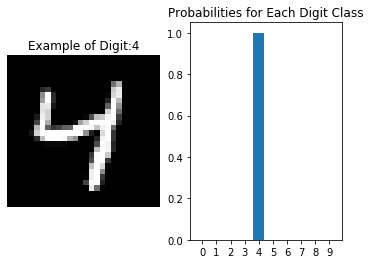

In [0]:

i = np.random.randint(0, len(x_test))

digit = x_test_bk[i].reshape(28,28)
x_test_digit = x_test_bk[i].reshape(1,28,28,1).astype("float32")
x_test_digit = x_test_digit/255


plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Digit:" + str(y_test_bk[i]))
plt.imshow(digit, cmap="gray")
plt.axis('off')

print("Predicting.....")
probs = model.predict_proba(x_test_digit, batch_size=1)
print(probs)


plt.subplot(1,2,2)
plt.title("Probabilities for Each Digit Class")
plt.bar(np.arange(10),probs.reshape(10), align="center")
plt.xticks(np.arange(10), np.arange(10).astype(str))
plt.show()
